In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5.5)

In [2]:
df=pd.read_excel(r'./cleaned_data.xlsx')
print(df.dtypes)

Property_Name                object
Property_id                   int64
Property_type                object
Property_status              object
Price_per_unit_area          object
Posted_On                    object
Project_URL                  object
builder_id                    int64
Builder_name                 object
Property_building_status     object
City_id                       int64
City_name                    object
No_of_BHK                    object
Locality_ID                   int64
Locality_Name                object
Longitude                   float64
Latitude                    float64
Price                        object
Size                         object
Sub_urban_ID                  int64
Sub_urban_name               object
description                  object
is_furnished                 object
listing_domain_score        float64
is_plot                        bool
is_RERA_registered             bool
is_Apartment                   bool
is_ready_to_move            

In [3]:
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,2486,5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,5324,8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [4]:
df['Price']=df['Price'].replace('\D','',regex=True).astype(int)
df['Price_per_unit_area']=df['Price_per_unit_area'].replace('\D','',regex=True).astype(int)
df['No_of_BHK']=df['No_of_BHK'].replace('\D','',regex=True).astype(int)

In [5]:
df[['Price_per_unit_area', 'Price']].describe()

,Price_per_unit_area,Price
count,143708.000000,1.437080e+05
mean,10664.535600,1.365094e+07
std,8512.886153,1.940871e+07
min,104.000000,1.000000e+05
25%,5256.000000,5.259438e+06
50%,7938.000000,8.500000e+06
75%,13333.000000,1.549800e+07
max,171969.000000,8.000000e+08


## Dividing based on Price : 1
We cosider a uniform division, with equal price ranges, `udf=1` consists of houses in price range 1,00,000 to 26,00,00,000, `udf=2` in price range 26,00,00,000 to 52,00,00,000 and `udf=3` in range 52,00,00,000 to 80,00,00,000.

In [6]:
df=df.sort_values('Price')

In [7]:
pt1=(df['Price'].min()+df['Price'].max())/3
pt2=(df['Price'].min()+df['Price'].max())*2/3
def label_udf(row):
    if row['Price']<=pt1:
        return '1'
    if row['Price']>pt2:
        return '3'
    return '2'
df['udf']=df.apply(lambda row: label_udf(row), axis=1)

<AxesSubplot:>

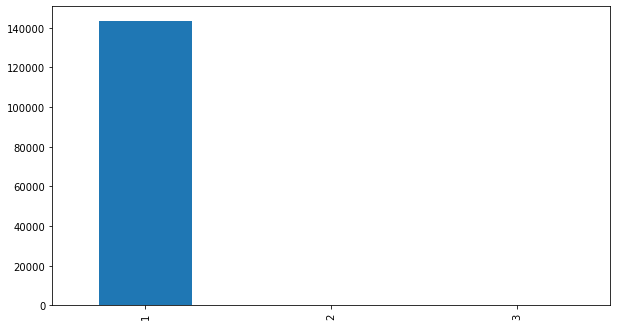

In [8]:
df['udf'].value_counts().plot.bar()

In [9]:
df['udf'].value_counts()

1    143605
2        93
3        10
Name: udf, dtype: int64

We see that the frequency of the houses in these ranges varies dramatically, with 143605 houses in `udf=1`, 93 in `udf=2` and only 10 in `udf=3`.


Therefore, we utilise a much more practical, a real world price range distribution, with `rdf=1` for price range 1,00,000 to 80,00,000, `rdf=2` for range 80,00,000 to 2,50,00,000, and `rdf=3` forprice range 2,50,00,000 to 80,00,00,000.

In [10]:
pt1=8000000
pt2=25000000
df['rdf']=df.apply(lambda row: label_udf(row), axis=1)

<AxesSubplot:>

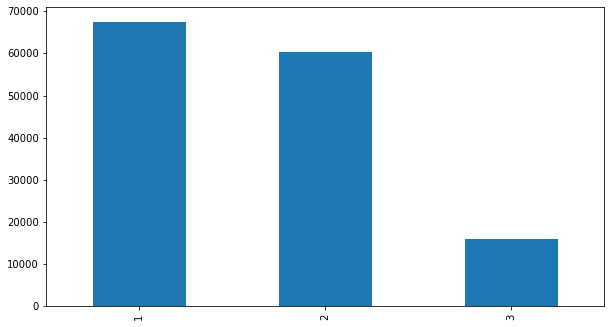

In [11]:
df['rdf'].value_counts().plot.bar()

In [12]:
df['rdf'].value_counts()

1    67514
2    60267
3    15927
Name: rdf, dtype: int64

The frequency still varies, but it is an improvement from the uniform distribution, with  houses 67514 in `udf=1`, 60267 in `udf=2` and only 15927 in `udf=3`.

Let us adjust the ranges a little for a uniform frequency across them, say, with `rdf=1` for price range 1,00,000 to 70,00,000, `rdf=2` for range 70,00,000 to 1,50,00,000, and `rdf=3` for price range 1,50,00,000 to 80,00,00,000.

In [10]:
pt1=7000000
pt2=15000000
df['rdf']=df.apply(lambda row: label_udf(row), axis=1)

<AxesSubplot:>

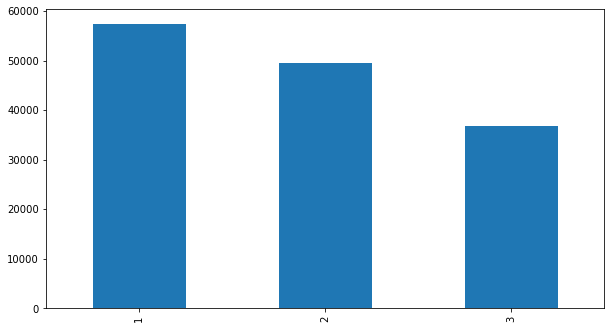

In [11]:
df['rdf'].value_counts().plot.bar()

In [12]:
df['rdf'].value_counts()

1    57451
2    49546
3    36711
Name: rdf, dtype: int64

This yeilds a much more uniform distribution of the frequency of the houses in these ranges, with 57451 houses in `rdf=1`, 49546 in `rdf=2` and 36711 in `rdf=3`. So, we will henceforth follow this division based on prices.

Let us compare other properties in the database to the price values.

<AxesSubplot:xlabel='City_name', ylabel='Price'>

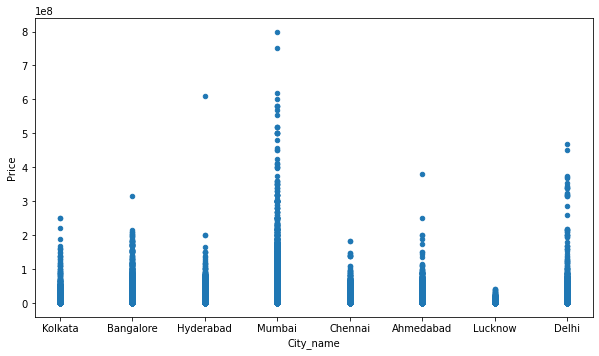

In [13]:
df.plot.scatter('City_name', 'Price')

<AxesSubplot:xlabel='No_of_BHK', ylabel='Price'>

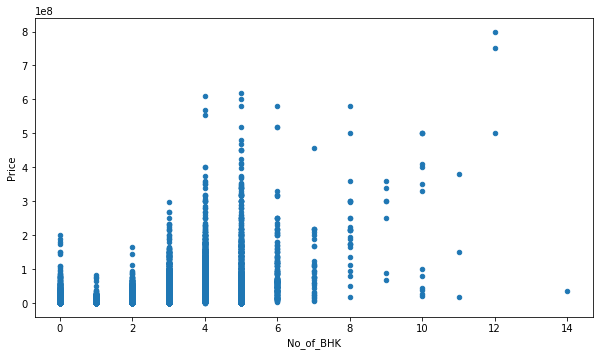

In [14]:
df.plot.scatter('No_of_BHK', 'Price')

<AxesSubplot:xlabel='Property_type', ylabel='Price'>

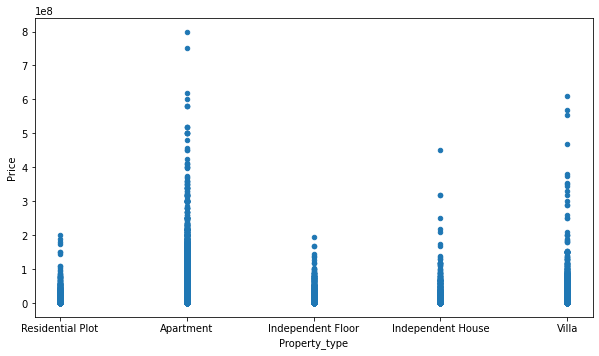

In [15]:
df.plot.scatter('Property_type', 'Price')

Let us look at the dataset for houses which have "Ready to move in" property, which would be of interest to investors for lease purposes. We will plot it against Price and Location.

In [16]:
df_r=df[df['is_ready_to_move']==True]

<AxesSubplot:xlabel='City_name', ylabel='Price'>

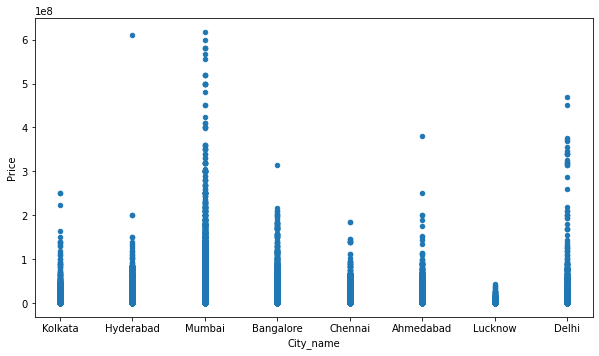

In [17]:
df_r.plot.scatter('City_name', 'Price')

Text(0.5, 1.0, 'Ready to move, price vs city, colored acc. to # of BHK')

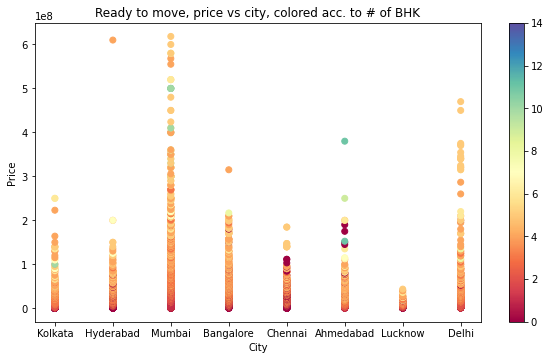

In [18]:
plt.scatter(df_r['City_name'], df_r['Price'], c=df_r['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Ready to move, price vs city, colored acc. to # of BHK')

Next, we surf the data for ready to move in, available for lease plots in emerging and high-tech cities like Hyderabad, Bangalore and Chennai.

In [19]:
def is_em_city(row):
    if row['City_name']=='Hyderabad':
        return True
    if row['City_name']=='Bangalore':
        return True
    if row['City_name']=='Chennai':
        return True
    return False
df_r['em_city']=(df_r.apply(lambda row: is_em_city(row), axis=1))

/tmp/ipykernel_28578/1140355488.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['em_city']=(df_r.apply(lambda row: is_em_city(row), axis=1))


In [20]:
df_r=df_r[df_r['em_city']==True]

Text(0.5, 1.0, 'Ready to move, price vs city, colored acc. to # of BHK')

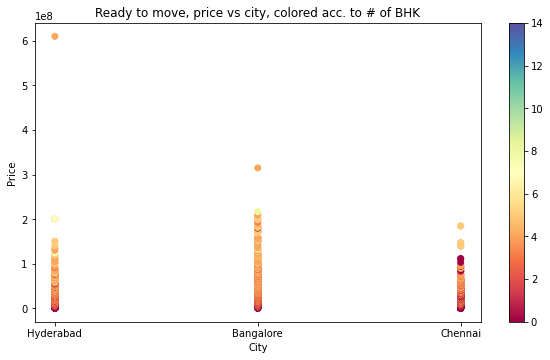

In [21]:
plt.scatter(df_r['City_name'], df_r['Price'], c=df_r['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Ready to move, price vs city, colored acc. to # of BHK')

To find properties with relatively larger area and lower prices, we can look at the attributes of `Price`, `Price_per_unit_area` and `Size`.

In [22]:
df['Size_sq_ft']=df['Size'].replace('\D','',regex=True).astype(int)

Text(0.5, 1.0, 'Ready to move, price vs cisizety, colored acc. to price per unit area')

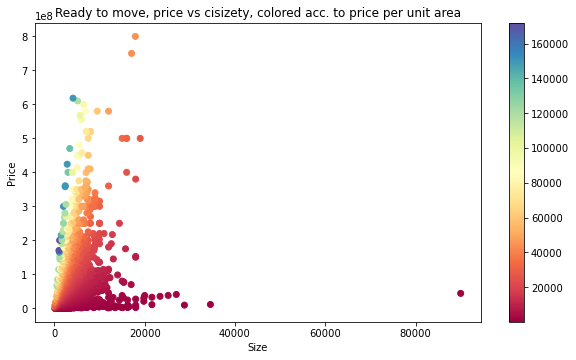

In [23]:
plt.scatter(df['Size_sq_ft'], df['Price'], c=df['Price_per_unit_area'], cmap='Spectral')
plt.colorbar()
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Ready to move, price vs cisizety, colored acc. to price per unit area')

As can be seen from the scatter plot, the properties which have a lower `Price_per_unit_area` would work in our favor. particularly, if we keep an upper limit of `Price_per_unit_area=40,000`, we can have properties with significantly larger size and a comparetively lower price. 

That is, we are basically constructing a diagonal starting at (0,0) which divides the graph into two parts and considering the bottom right half, that represents a larger size and smaller size.

In [24]:
df['Price_per_unit_area'].describe()

count    143708.000000
mean      10664.535600
std        8512.886153
min         104.000000
25%        5256.000000
50%        7938.000000
75%       13333.000000
max      171969.000000
Name: Price_per_unit_area, dtype: float64

Text(0.5, 1.0, 'Ready to move, price vs size, colored acc. to price per unit area')

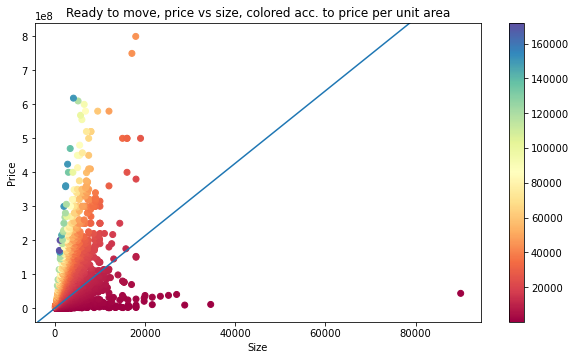

In [72]:
plt.scatter(df['Size_sq_ft'], df['Price'], c=df['Price_per_unit_area'], cmap='Spectral')
plt.colorbar()
plt.axline([0,0], [1,10665])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Ready to move, price vs size, colored acc. to price per unit area')

Extracting the part of the plot below the averaging line, we can get an estimate of prices for the larger plots.

In [26]:
df_ls=df[df['Price_per_unit_area']<=10664]

<AxesSubplot:xlabel='Size_sq_ft', ylabel='Price'>

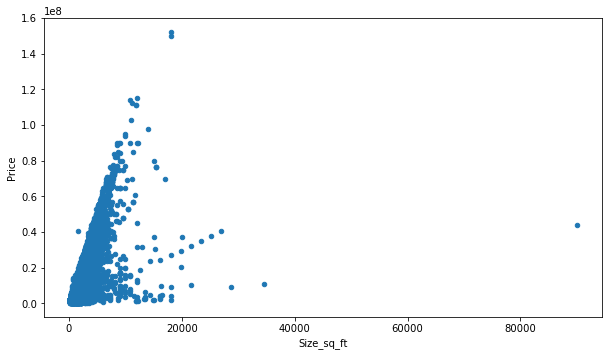

In [27]:
df_ls.plot.scatter('Size_sq_ft', 'Price')

In [28]:
df_ls['Size_sq_ft'].describe()

count    96797.000000
mean      1300.558096
std        935.509412
min        113.000000
25%        774.000000
50%       1121.000000
75%       1548.000000
max      90000.000000
Name: Size_sq_ft, dtype: float64

Lets create bar graphs for the same, by dividing the size of the area into ranges of 100 square feet to 700 square feet, 700 square feet to 1000 square feet, 1000 square feet to 1600 square feet, and 1600 square feet to 90000 square feet. We will refer to these slices as `s_sl=1`, `s_sl=2`, `s_sl=3`, and `s_sl=4` respectively.

In [29]:
def label_ssl(row):
    if row['Size_sq_ft']<=700:
        return '1'
    if row['Size_sq_ft']<=1000 and row['Size_sq_ft']>700:
        return '2'
    if row['Size_sq_ft']<=1600 and row['Size_sq_ft']>1000:
        return '3'
    if row['Size_sq_ft']>1600:
        return '4'
df_ls['s_sl']=df_ls.apply(lambda row: label_ssl(row), axis=1)

/tmp/ipykernel_28578/1439034569.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['s_sl']=df_ls.apply(lambda row: label_ssl(row), axis=1)


<AxesSubplot:>

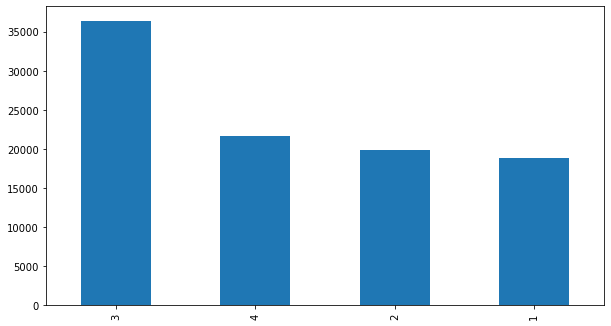

In [30]:
df_ls['s_sl'].value_counts().plot.bar()

In [31]:
df_ls['s_sl'].value_counts()

3    36405
4    21655
2    19873
1    18864
Name: s_sl, dtype: int64

So, there are 18864 low budget property opportunities in the size range of 100 square feet to 700 square feet, 19873 such in 700 square feet to 1000 square feet, 36405 in 1000 square feet to 1600 square feet, and 21655 in 1600 square feet to 90000 square feet.

Let us do the same for price ranges this time, using the same price ranges as above.

In [32]:
df_ls['rdf']=df_ls.apply(lambda row: label_udf(row), axis=1)

/tmp/ipykernel_28578/1254273909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ls['rdf']=df_ls.apply(lambda row: label_udf(row), axis=1)


<AxesSubplot:>

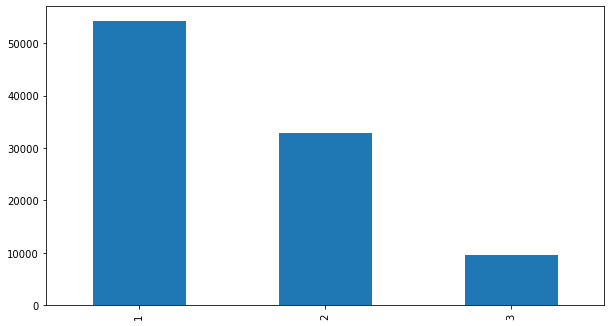

In [33]:
df_ls['rdf'].value_counts().plot.bar()

In [34]:
df_ls['rdf'].value_counts()

1    54267
2    32901
3     9629
Name: rdf, dtype: int64

So, there are 54267 larger but comparetively low budget property opportunities in the price range of 1,00,000 to 26,00,00,000, 32901 in 26,00,00,000 to 52,00,00,000 and 9629 in range 52,00,00,000 to 80,00,00,000.

In [3]:
df[['City_name','Locality_Name']].describe()

,City_name,Locality_Name
count,143708,143708
unique,8,1244
top,Mumbai,Mira Road East
freq,72152,9590


Let us split the database based on cities. This would allow us to make bar graphs for the number of properties based on their localities in each city. Such a method allows investors to look at the data in a statistical way, apealing to both, those who want to invest by locality or across the city.

In [4]:
df['City_name'].unique()

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Lucknow', 'Mumbai'], dtype=object)

In [5]:
df_a=df[df['City_name']=='Ahmedabad']
df_b=df[df['City_name']=='Bangalore']
df_c=df[df['City_name']=='Chennai']
df_d=df[df['City_name']=='Delhi']
df_h=df[df['City_name']=='Hyderabad']
df_k=df[df['City_name']=='Kolkata']
df_l=df[df['City_name']=='Lucknow']
df_m=df[df['City_name']=='Mumbai']

In [6]:
print(len(df_a['Locality_Name'].unique()))
print(len(df_b['Locality_Name'].unique()))
print(len(df_c['Locality_Name'].unique()))
print(len(df_d['Locality_Name'].unique()))
print(len(df_h['Locality_Name'].unique()))
print(len(df_k['Locality_Name'].unique()))
print(len(df_l['Locality_Name'].unique()))
print(len(df_m['Locality_Name'].unique()))

100
217
179
124
233
122
62
213


<AxesSubplot:>

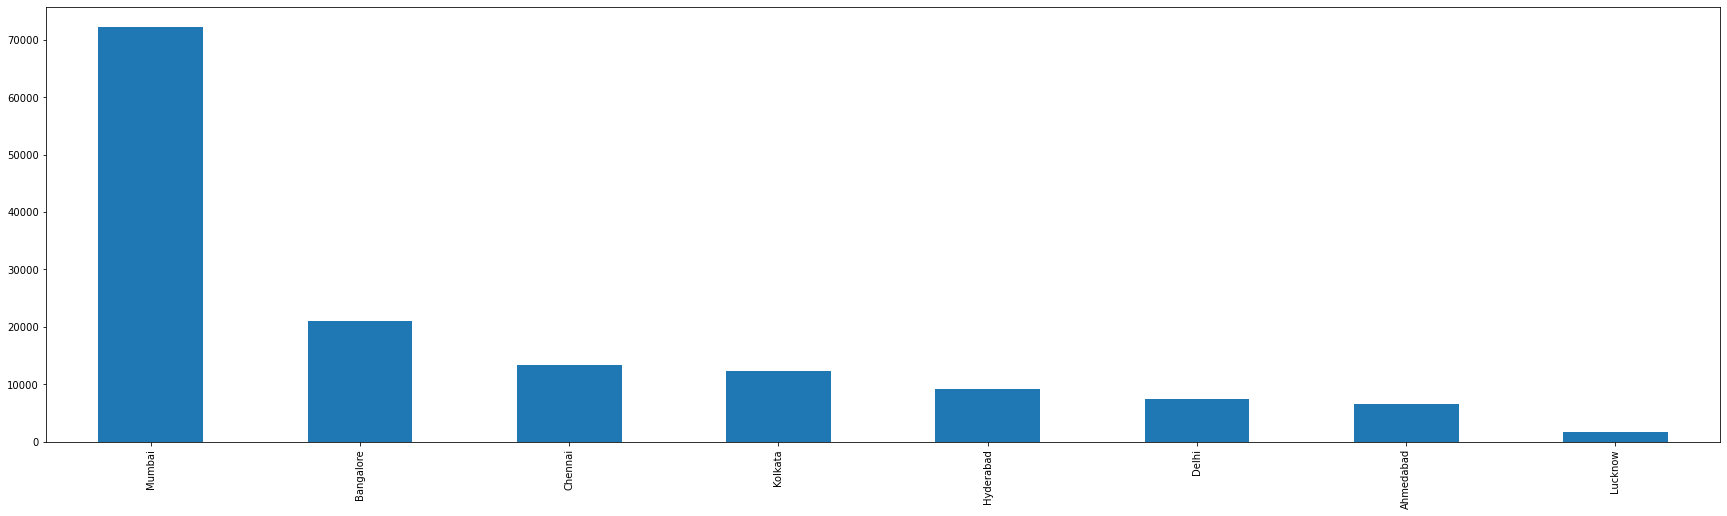

In [7]:
df['City_name'].value_counts().plot.bar(figsize=(30,8))

In [8]:
df['City_name'].value_counts()

Mumbai       72152
Bangalore    21019
Chennai      13406
Kolkata      12224
Hyderabad     9129
Delhi         7476
Ahmedabad     6612
Lucknow       1690
Name: City_name, dtype: int64

<AxesSubplot:>

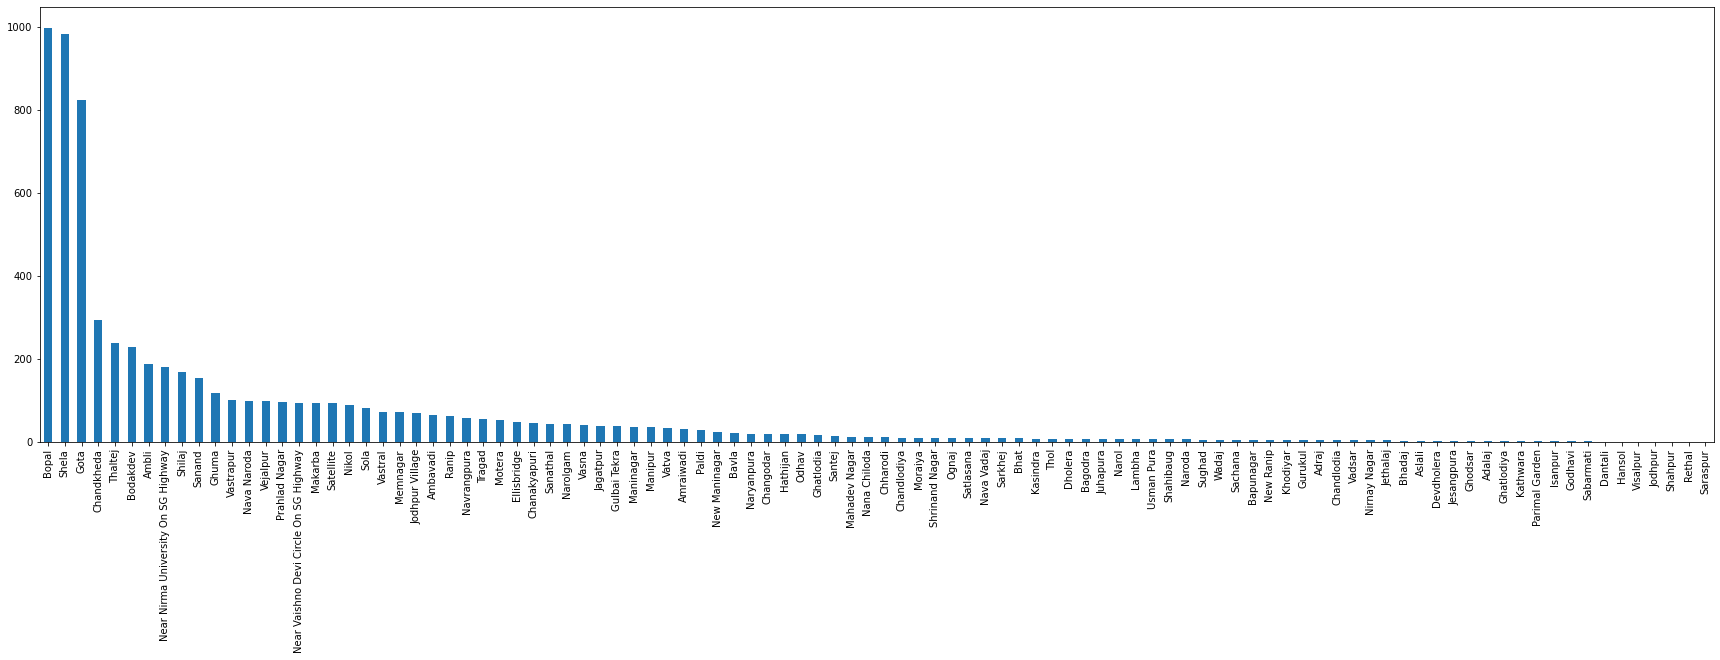

In [61]:
# Ahemdabad
df_a['Locality_Name'].value_counts().plot.bar(figsize=(30,8))

In [9]:
df_a['Locality_Name'].value_counts()

Bopal         999
Shela         984
Gota          825
Chandkheda    295
Thaltej       239
             ... 
Hansol          1
Jodhpur         1
Saraspur        1
Visalpur        1
Shahpur         1
Name: Locality_Name, Length: 100, dtype: int64

<AxesSubplot:>

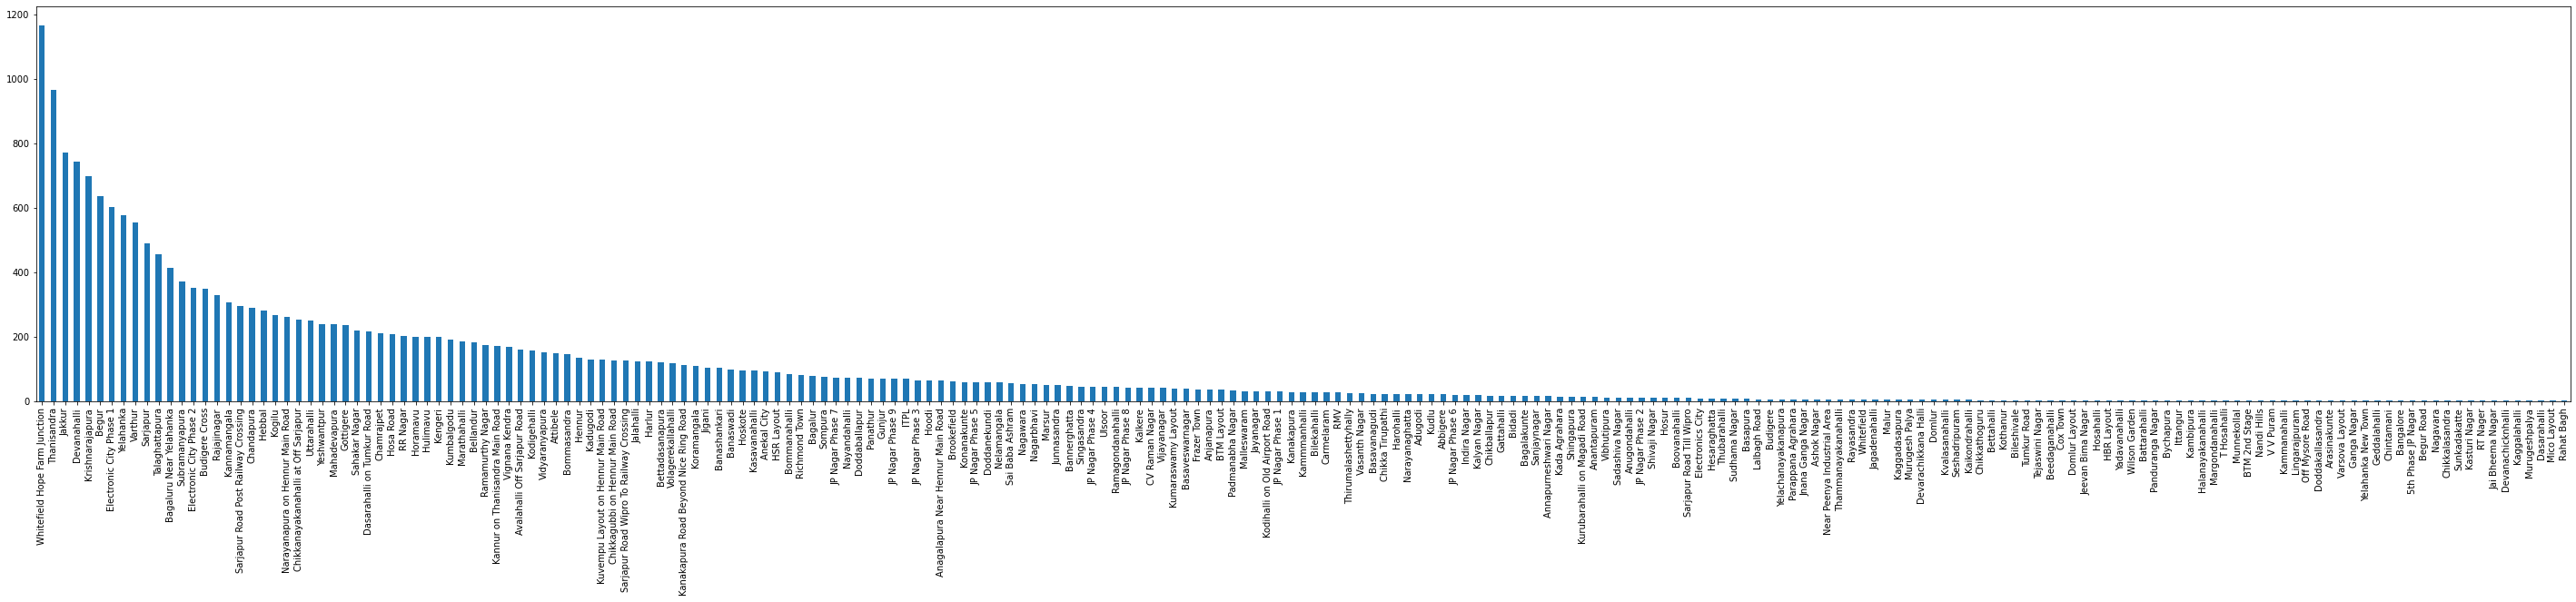

In [63]:
# Bangalore
df_b['Locality_Name'].value_counts().plot.bar(figsize=(50,8))

In [10]:
df_b['Locality_Name'].value_counts()

Whitefield Hope Farm Junction    1167
Thanisandra                       965
Jakkur                            771
Devanahalli                       743
Krishnarajapura                   698
                                 ... 
Chikkalasandra                      1
Lingarajpuram                       1
Yelahanka New Town                  1
Jai Bheema Nagar                    1
Kaggalahalli                        1
Name: Locality_Name, Length: 217, dtype: int64

<AxesSubplot:>

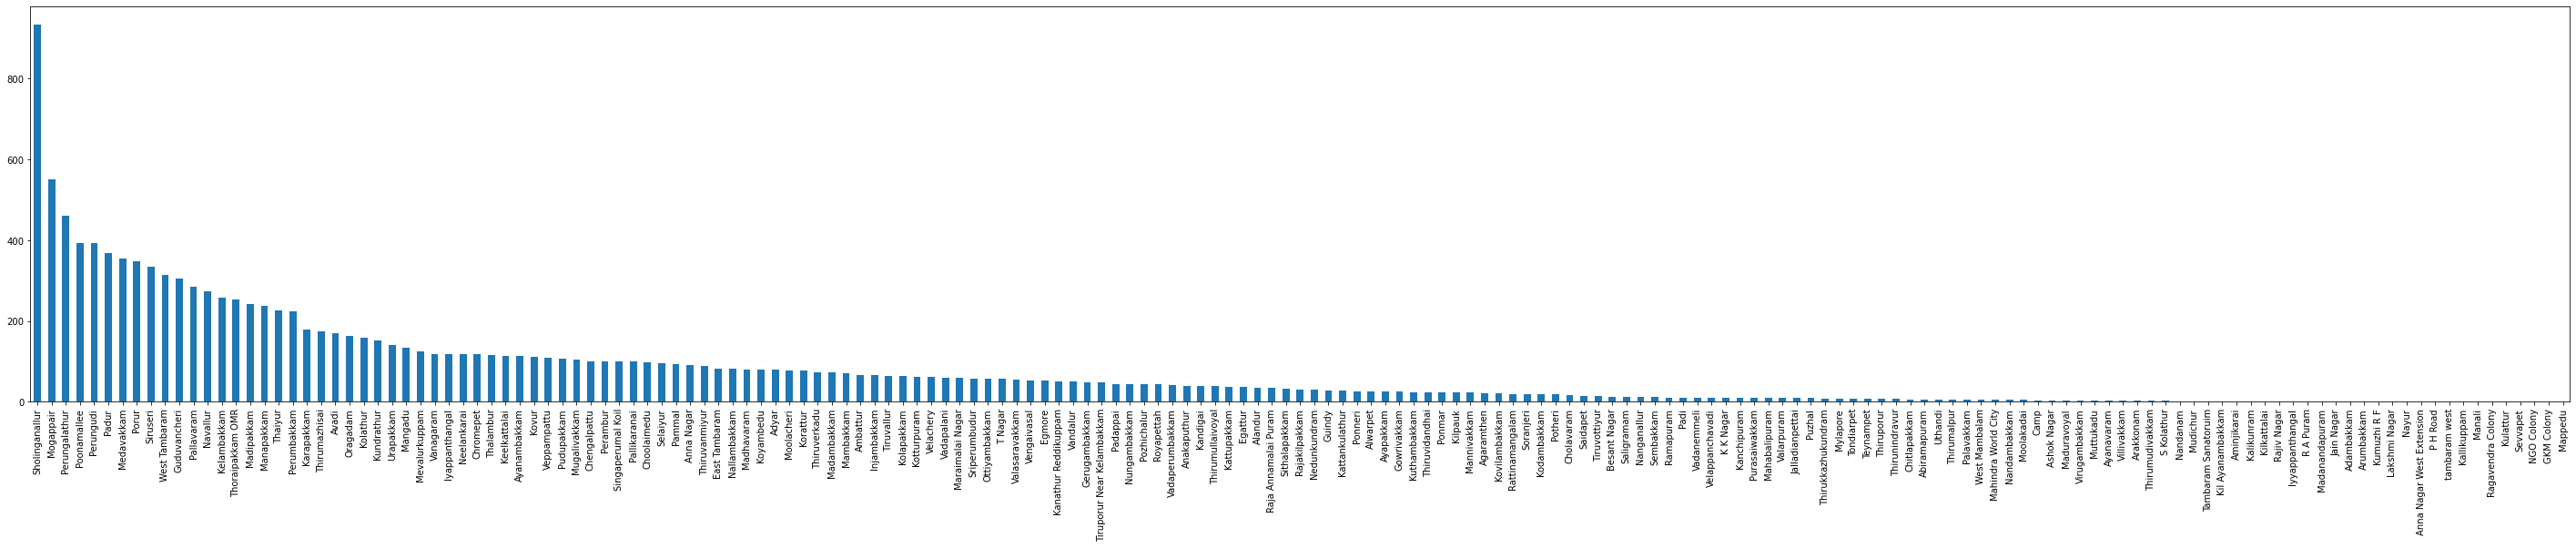

In [65]:
# Chennai
df_c['Locality_Name'].value_counts().plot.bar(figsize=(50,8))

In [11]:
df_c['Locality_Name'].value_counts()

Sholinganallur     933
Mogappair          550
Perungalathur      461
Poonamallee        394
Perungudi          392
                  ... 
Mappedu              1
Kallikuppam          1
Kalikunram           1
Adambakkam           1
Iyyappanthangal      1
Name: Locality_Name, Length: 179, dtype: int64

<AxesSubplot:>

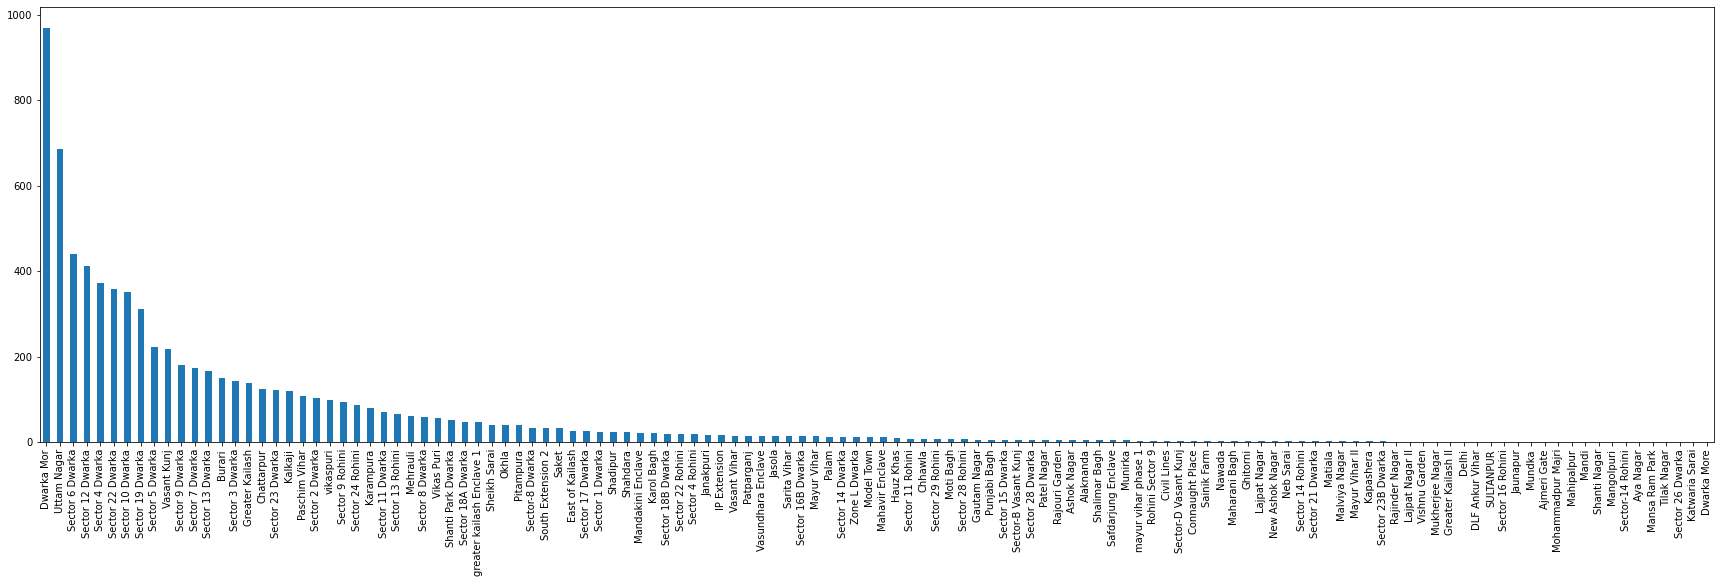

In [67]:
# Delhi
df_d['Locality_Name'].value_counts().plot.bar(figsize=(30,8))

In [12]:
df_d['Locality_Name'].value_counts()

Dwarka Mor          969
Uttam Nagar         686
Sector 6 Dwarka     440
Sector 12 Dwarka    411
Sector 4 Dwarka     371
                   ... 
Sector 16 Rohini      1
SULTANPUR             1
Ajmeri Gate           1
Delhi                 1
Tilak Nagar           1
Name: Locality_Name, Length: 124, dtype: int64

<AxesSubplot:>

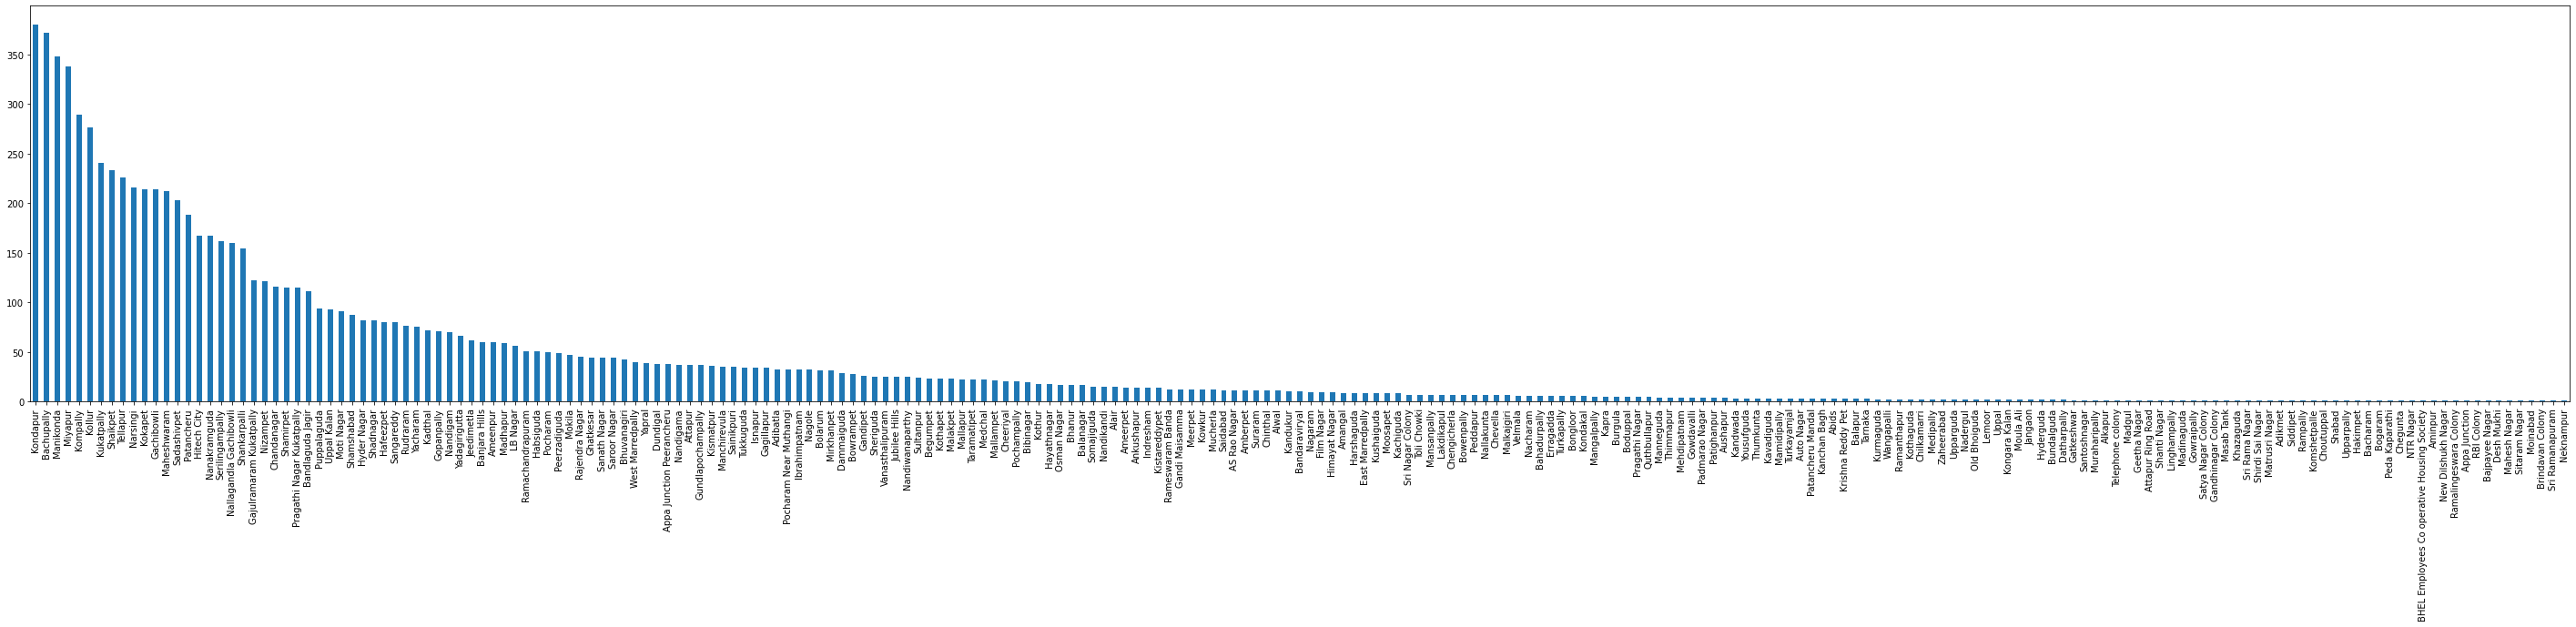

In [68]:
# Hyderabad
df_h['Locality_Name'].value_counts().plot.bar(figsize=(50,8))

In [13]:
df_h['Locality_Name'].value_counts()

Kondapur              380
Bachupally            372
Manikonda             348
Miyapur               338
Kompally              289
                     ... 
Siddipet                1
Sitaram Nagar           1
Neknampur               1
Sri Rama Nagar          1
New Dilshukh Nagar      1
Name: Locality_Name, Length: 233, dtype: int64

<AxesSubplot:>

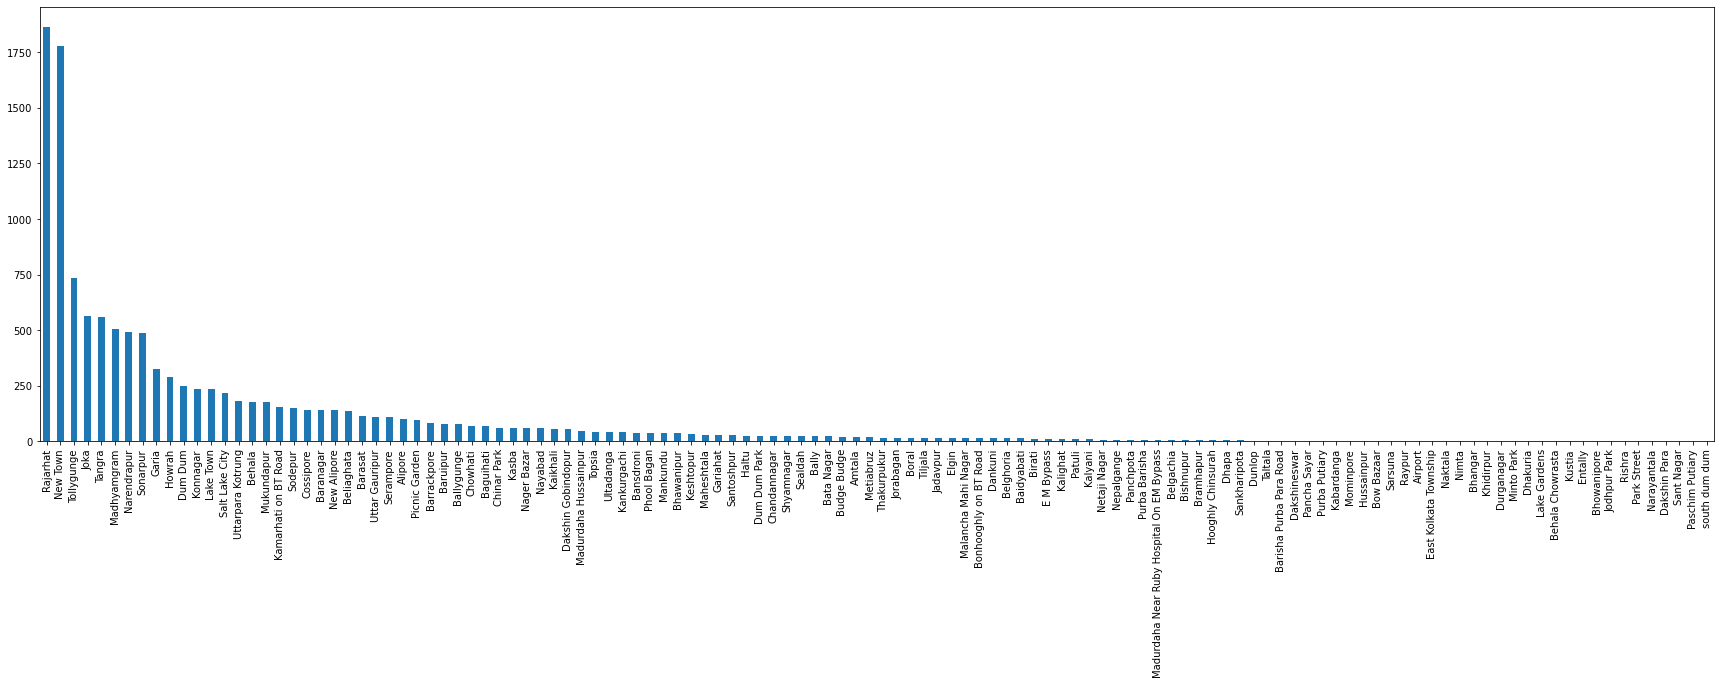

In [69]:
# Kolkata
df_k['Locality_Name'].value_counts().plot.bar(figsize=(30,8))

In [14]:
df_k['Locality_Name'].value_counts()

Rajarhat         1862
New Town         1778
Tollygunge        733
Joka              563
Tangra            560
                 ... 
Bhangar             1
south dum dum       1
Narayantala         1
Jodhpur Park        1
Bhowanipore         1
Name: Locality_Name, Length: 122, dtype: int64

<AxesSubplot:>

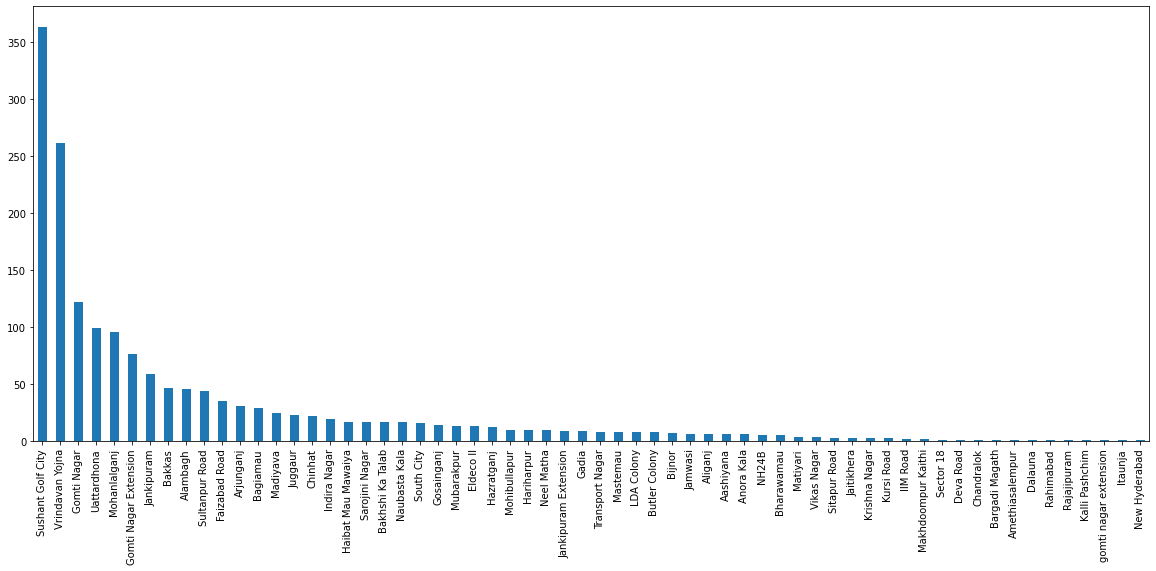

In [70]:
# Lucknow
df_l['Locality_Name'].value_counts().plot.bar(figsize=(20,8))

In [15]:
df_l['Locality_Name'].value_counts()

Sushant Golf City        363
Vrindavan Yojna          261
Gomti Nagar              122
Uattardhona               99
Mohanlalganj              96
                        ... 
gomti nagar extension      1
Deva Road                  1
New Hyderabad              1
Bargadi Magath             1
Dalauna                    1
Name: Locality_Name, Length: 62, dtype: int64

<AxesSubplot:>

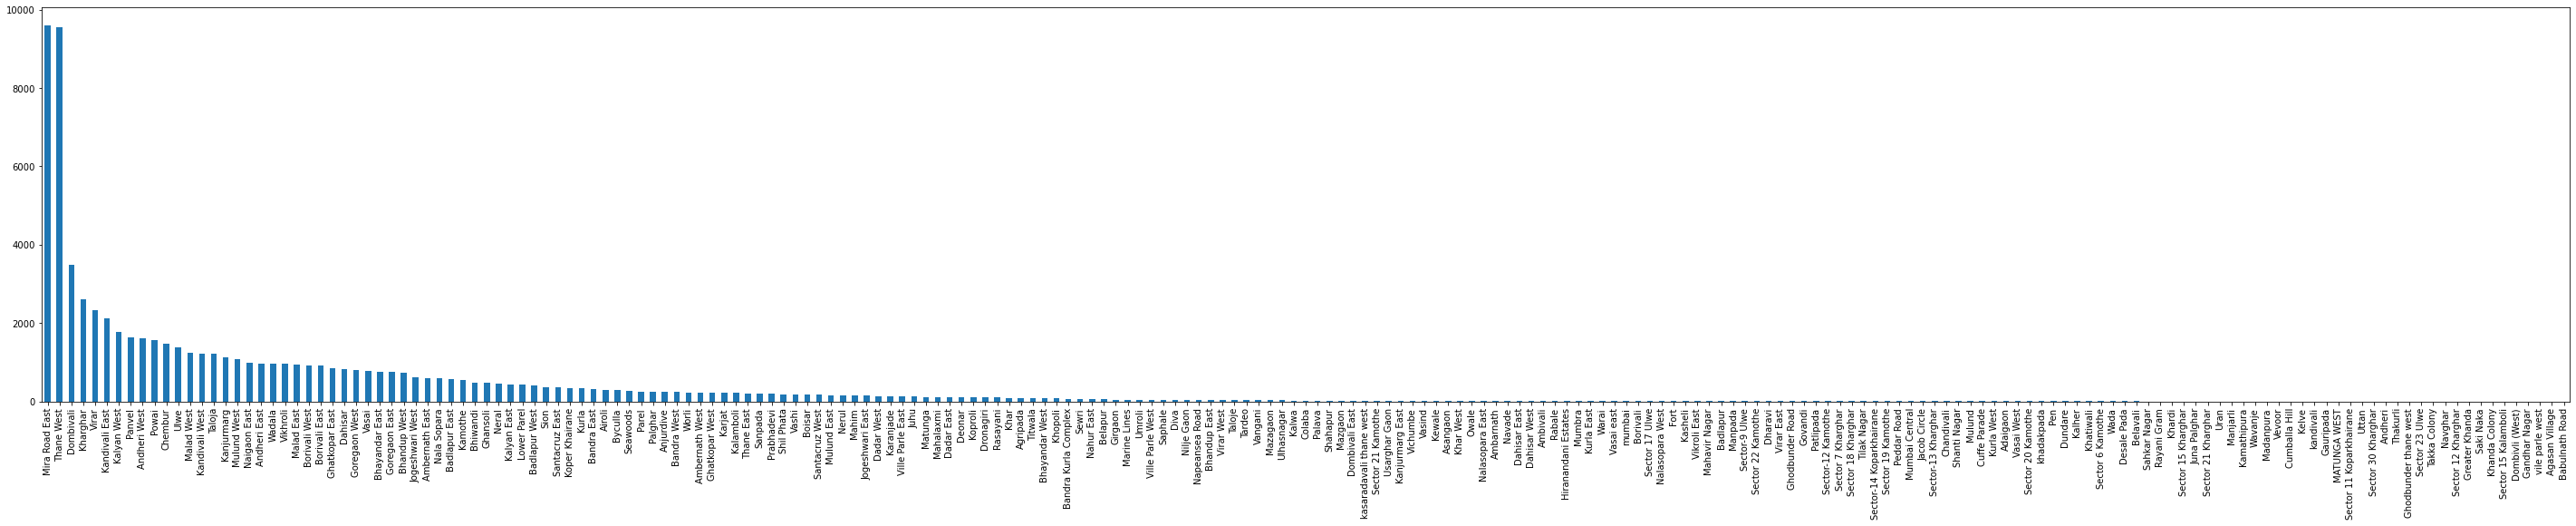

In [71]:
# Mumbai
df_m['Locality_Name'].value_counts().plot.bar(figsize=(50,8))

In [16]:
df_m['Locality_Name'].value_counts()

Mira Road East        9590
Thane West            9559
Dombivali             3475
Kharghar              2610
Virar                 2338
                      ... 
Thakurli                 1
Sector 23 Ulwe           1
Saki Naka                1
Agasan Village           1
Sector 15 Kharghar       1
Name: Locality_Name, Length: 213, dtype: int64

Let us also explore cost variation of properties per locality in these 8 cities

Text(0.5, 1.0, 'AHEMDABAD: Price per locality, colored acc. to # of BHK')

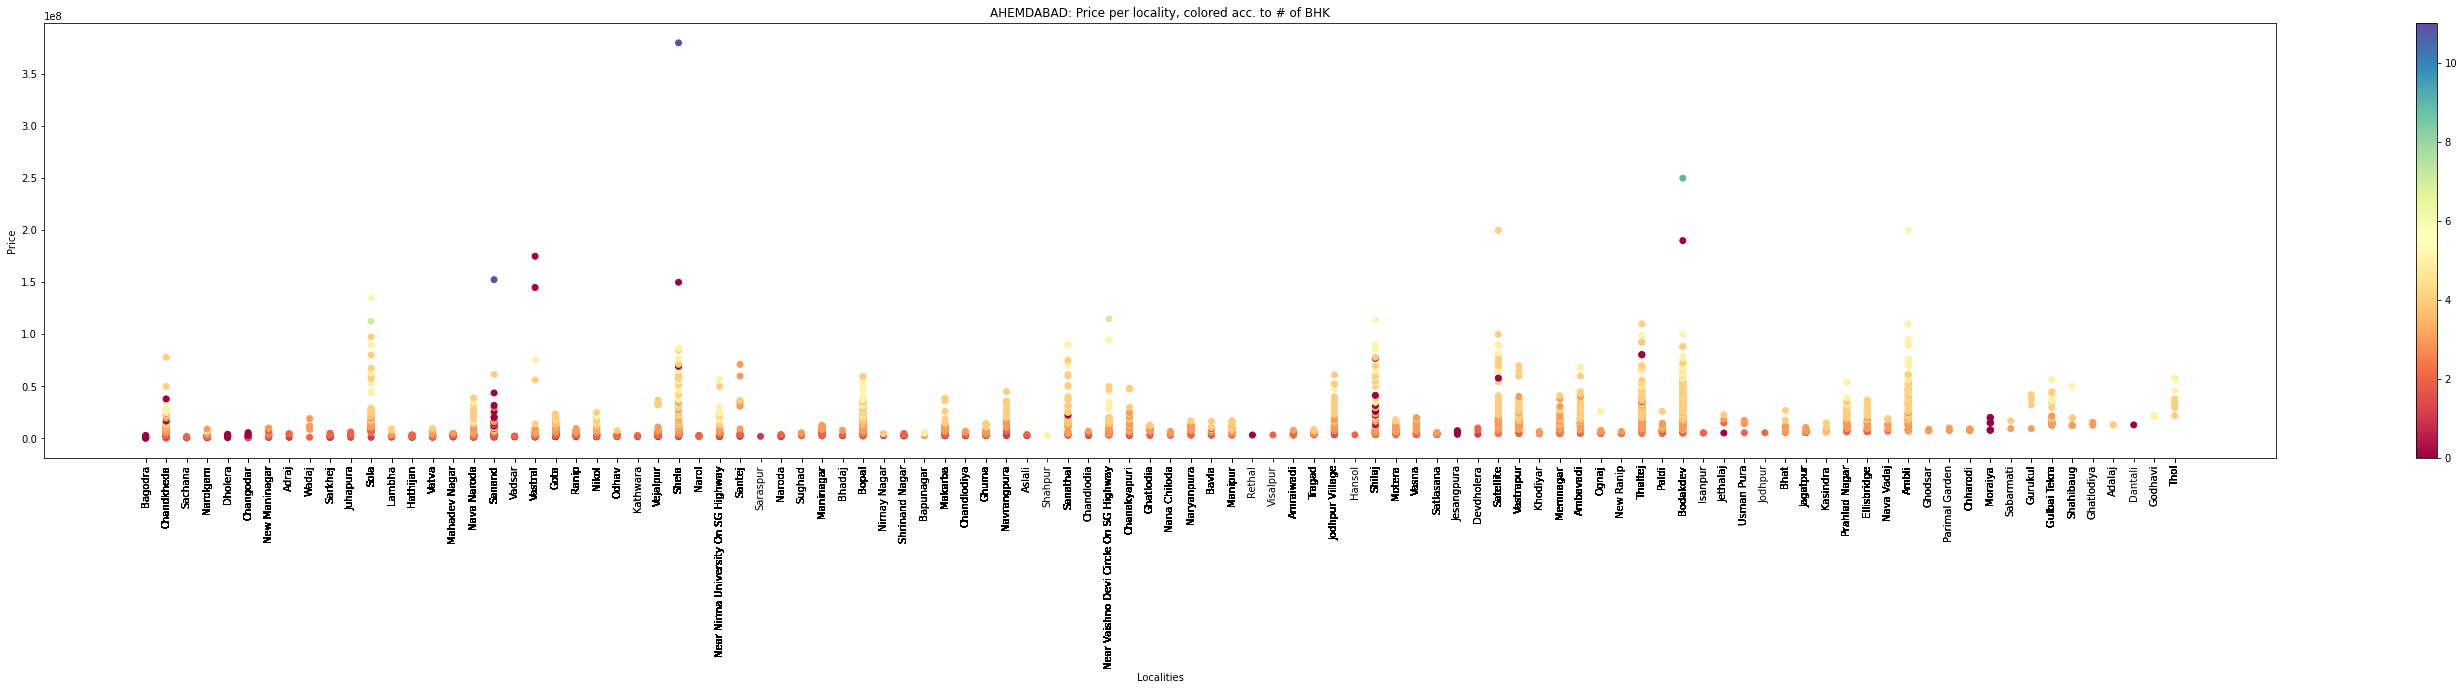

In [90]:
plt.figure(figsize=[50,8])
plt.scatter(df_a['Locality_Name'], df_a['Price'], c=df_a['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xticks(df_a['Locality_Name'], rotation='vertical')
plt.xlabel('Localities')
plt.ylabel('Price')
plt.title('AHEMDABAD: Price per locality, colored acc. to # of BHK')

Text(0.5, 1.0, 'BANGALORE: Price per locality, colored acc. to # of BHK')

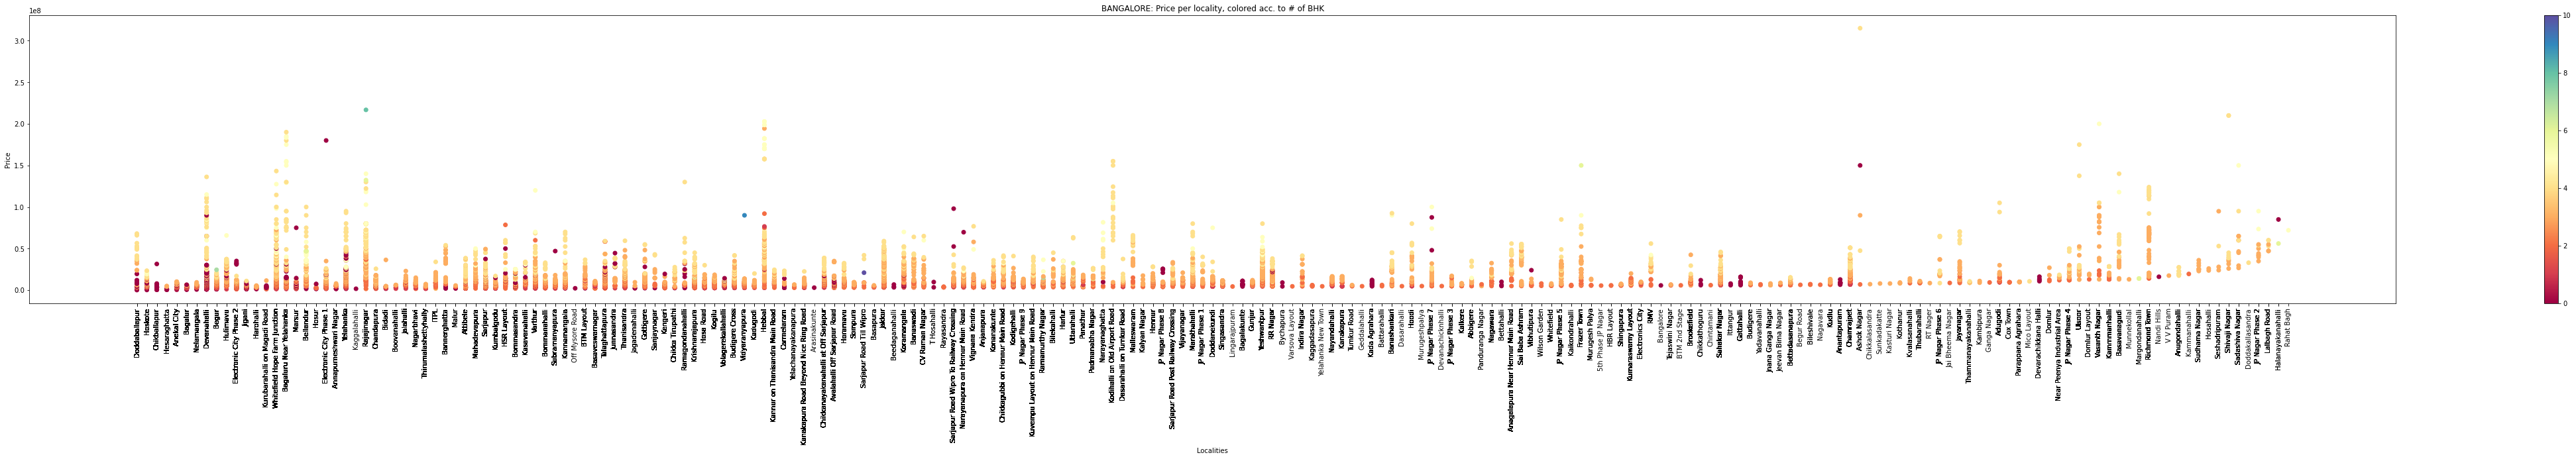

In [91]:
plt.figure(figsize=[80,8])
plt.scatter(df_b['Locality_Name'], df_b['Price'], c=df_b['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xticks(df_b['Locality_Name'], rotation='vertical')
plt.xlabel('Localities')
plt.ylabel('Price')
plt.title('BANGALORE: Price per locality, colored acc. to # of BHK')

Text(0.5, 1.0, 'CHENNAI: Price per locality, colored acc. to # of BHK')

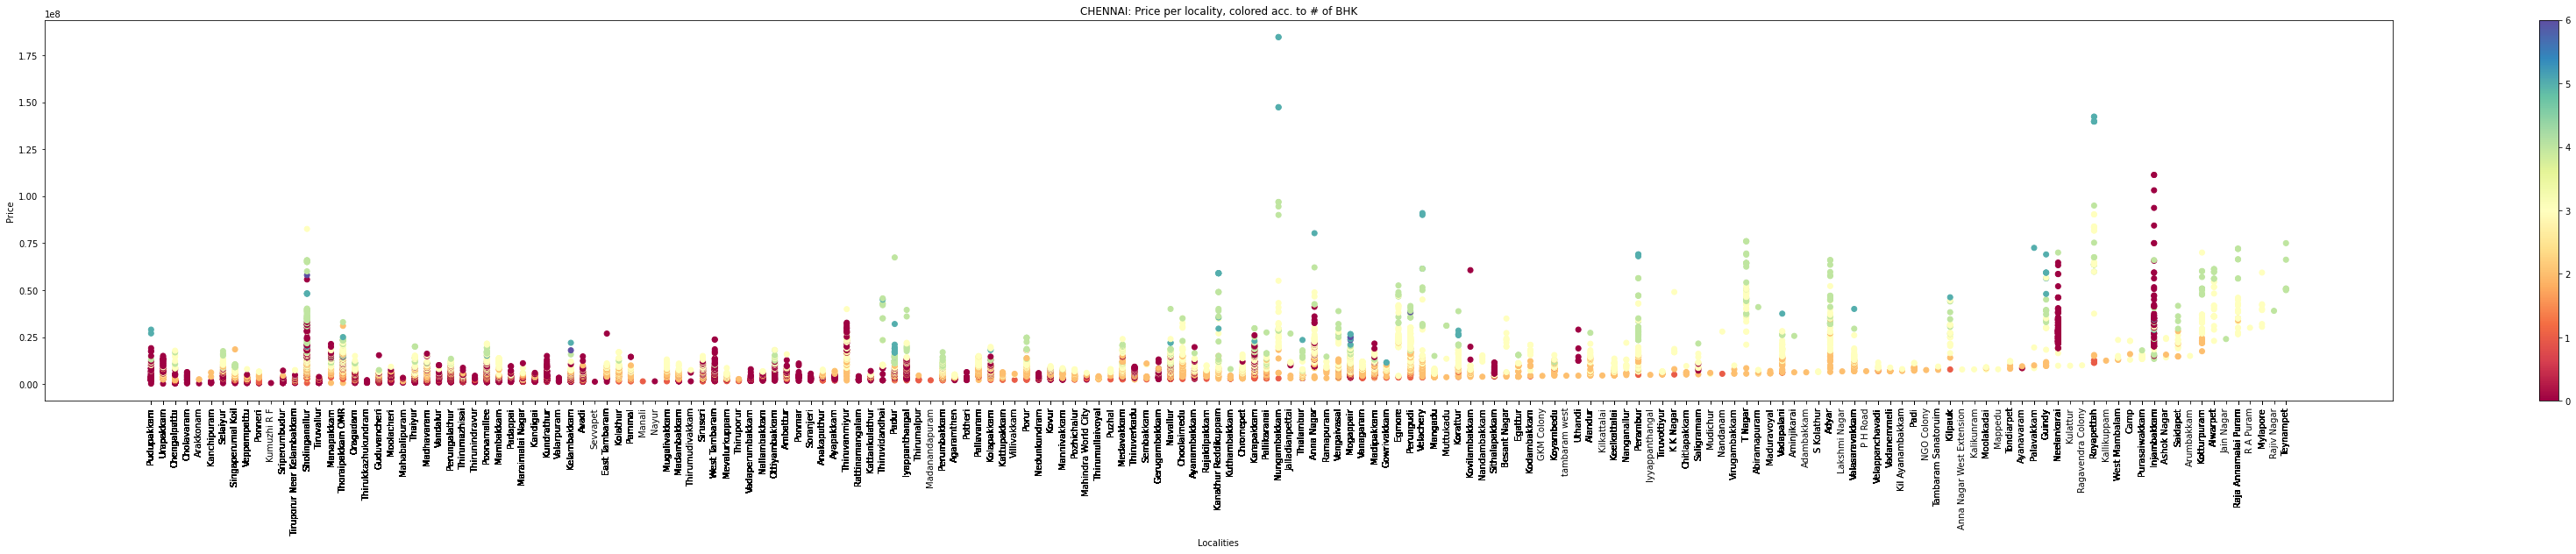

In [92]:
plt.figure(figsize=[60,8])
plt.scatter(df_c['Locality_Name'], df_c['Price'], c=df_c['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xticks(df_c['Locality_Name'], rotation='vertical')
plt.xlabel('Localities')
plt.ylabel('Price')
plt.title('CHENNAI: Price per locality, colored acc. to # of BHK')

Text(0.5, 1.0, 'DELHI: Price per locality, colored acc. to # of BHK')

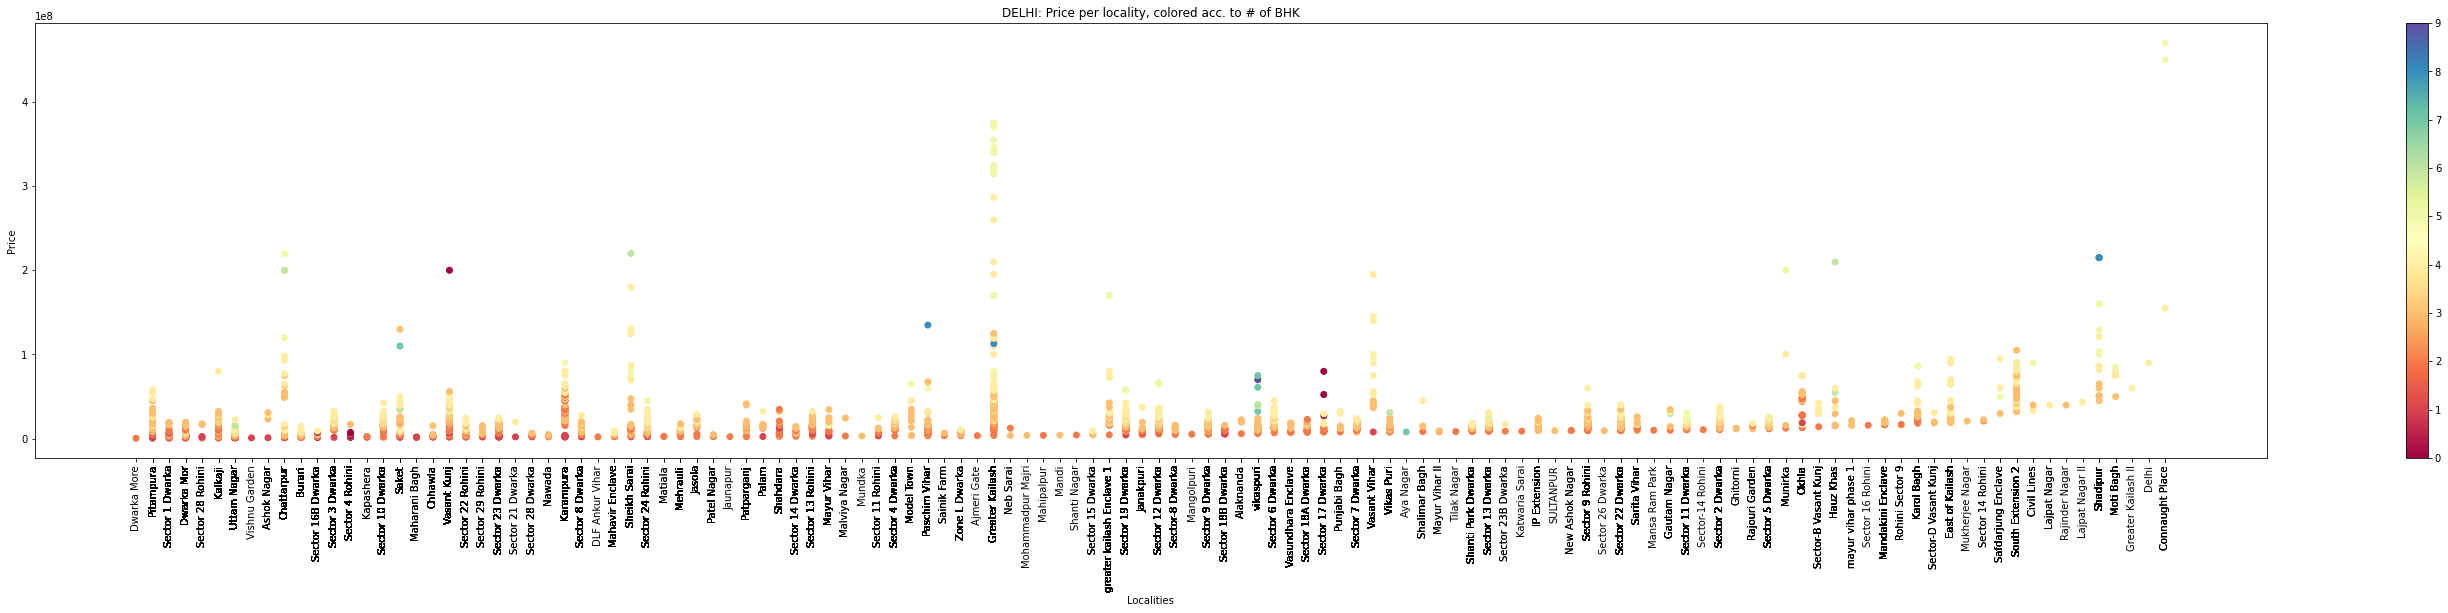

In [93]:
plt.figure(figsize=[50,8])
plt.scatter(df_d['Locality_Name'], df_d['Price'], c=df_d['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xticks(df_d['Locality_Name'], rotation='vertical')
plt.xlabel('Localities')
plt.ylabel('Price')
plt.title('DELHI: Price per locality, colored acc. to # of BHK')

Text(0.5, 1.0, 'HYDERABAD: Price per locality, colored acc. to # of BHK')

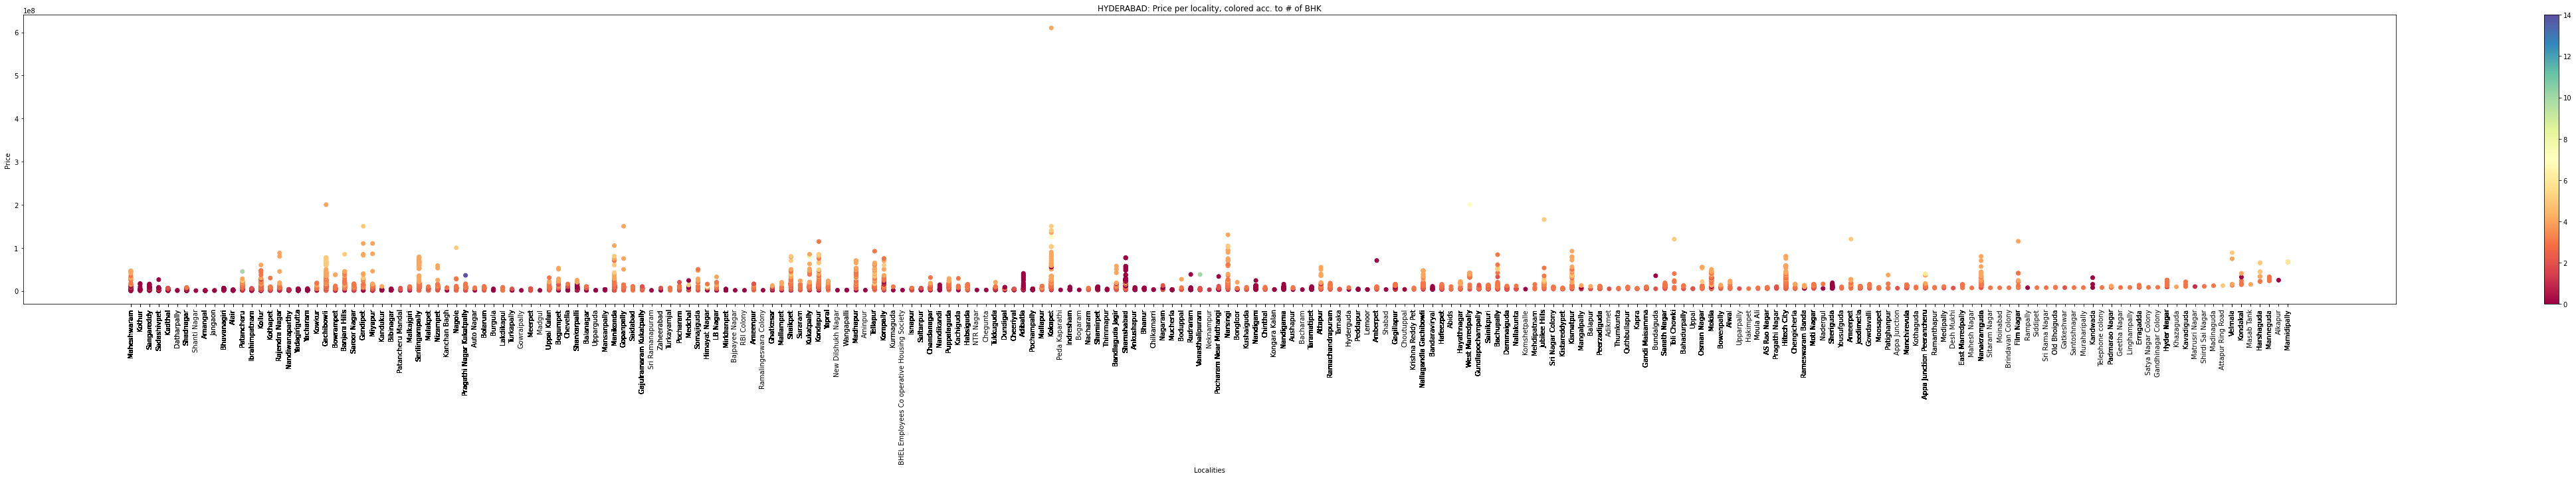

In [94]:
plt.figure(figsize=[80,8])
plt.scatter(df_h['Locality_Name'], df_h['Price'], c=df_h['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xticks(df_h['Locality_Name'], rotation='vertical')
plt.xlabel('Localities')
plt.ylabel('Price')
plt.title('HYDERABAD: Price per locality, colored acc. to # of BHK')

Text(0.5, 1.0, 'KOLKATA: Price per locality, colored acc. to # of BHK')

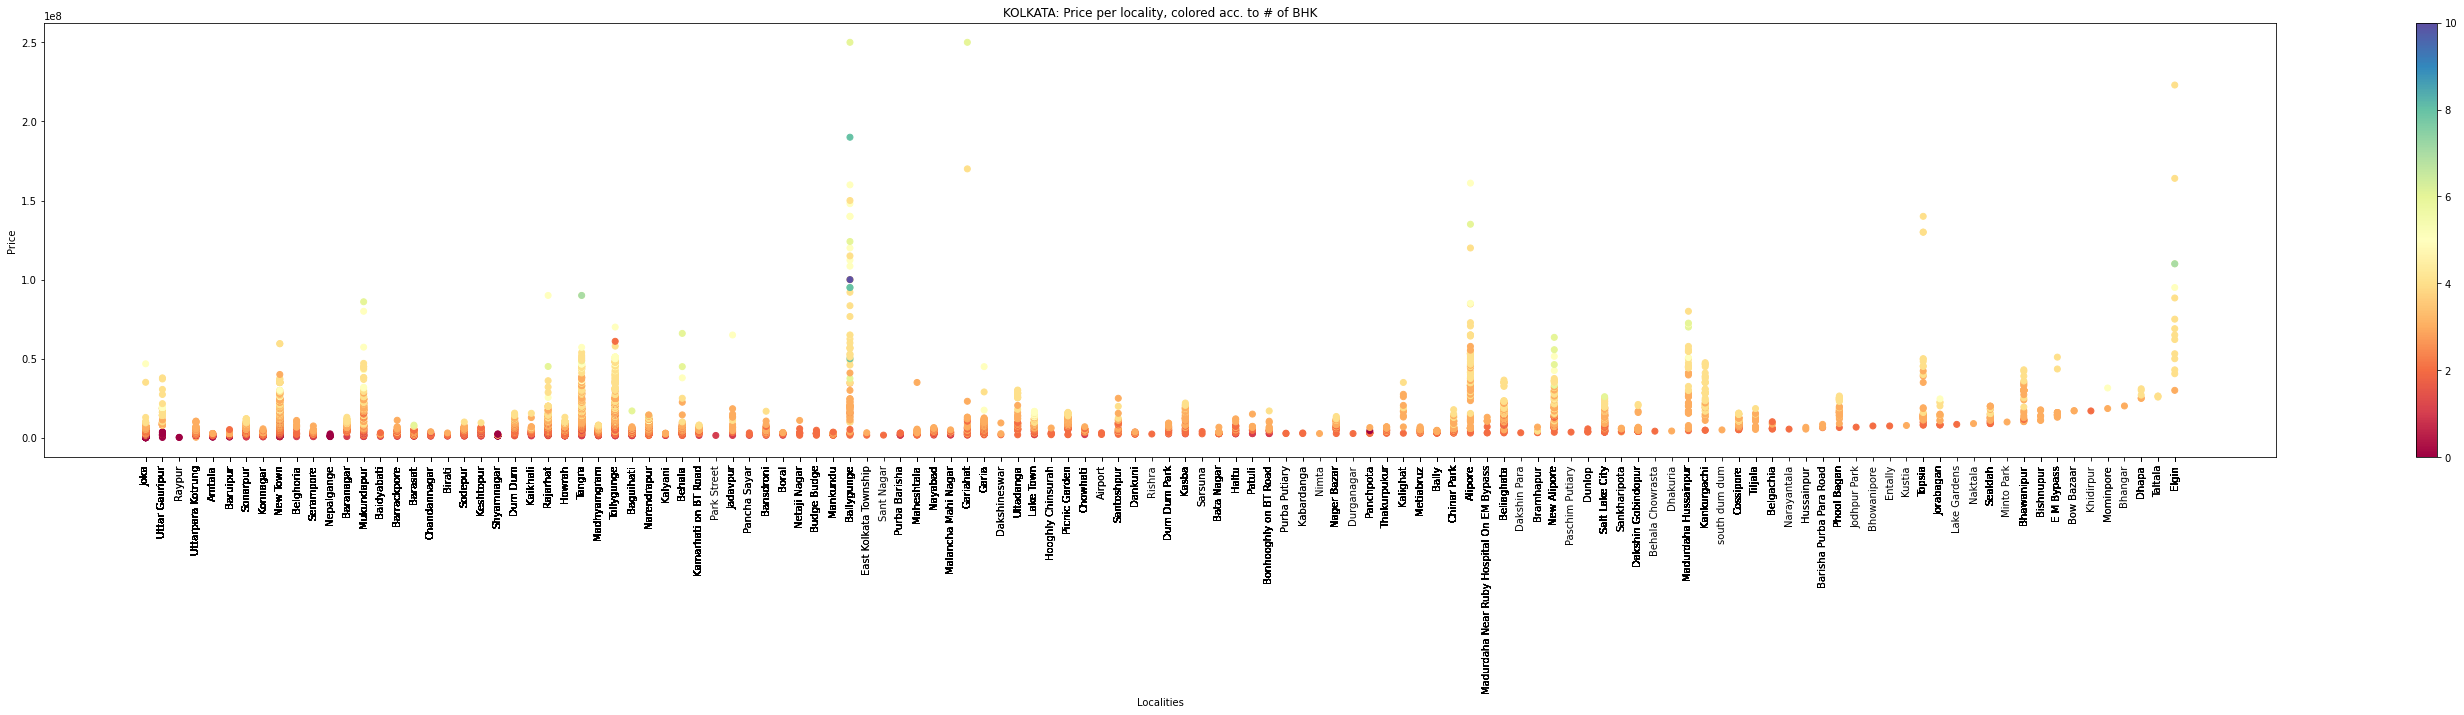

In [95]:
plt.figure(figsize=[50,8])
plt.scatter(df_k['Locality_Name'], df_k['Price'], c=df_k['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xticks(df_k['Locality_Name'], rotation='vertical')
plt.xlabel('Localities')
plt.ylabel('Price')
plt.title('KOLKATA: Price per locality, colored acc. to # of BHK')

Text(0.5, 1.0, 'LUCKNOW: Price per locality, colored acc. to # of BHK')

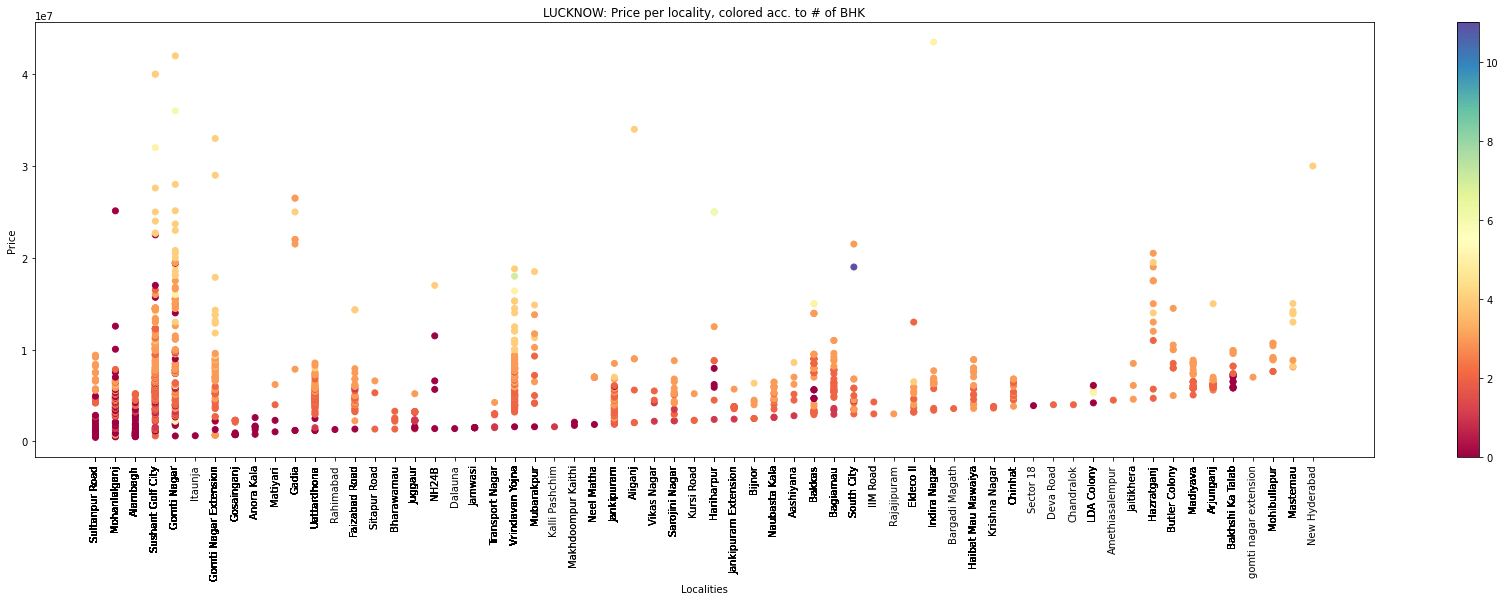

In [96]:
plt.figure(figsize=[30,8])
plt.scatter(df_l['Locality_Name'], df_l['Price'], c=df_l['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xticks(df_l['Locality_Name'], rotation='vertical')
plt.xlabel('Localities')
plt.ylabel('Price')
plt.title('LUCKNOW: Price per locality, colored acc. to # of BHK')

Text(0.5, 1.0, 'MUMBAI: Price per locality, colored acc. to # of BHK')

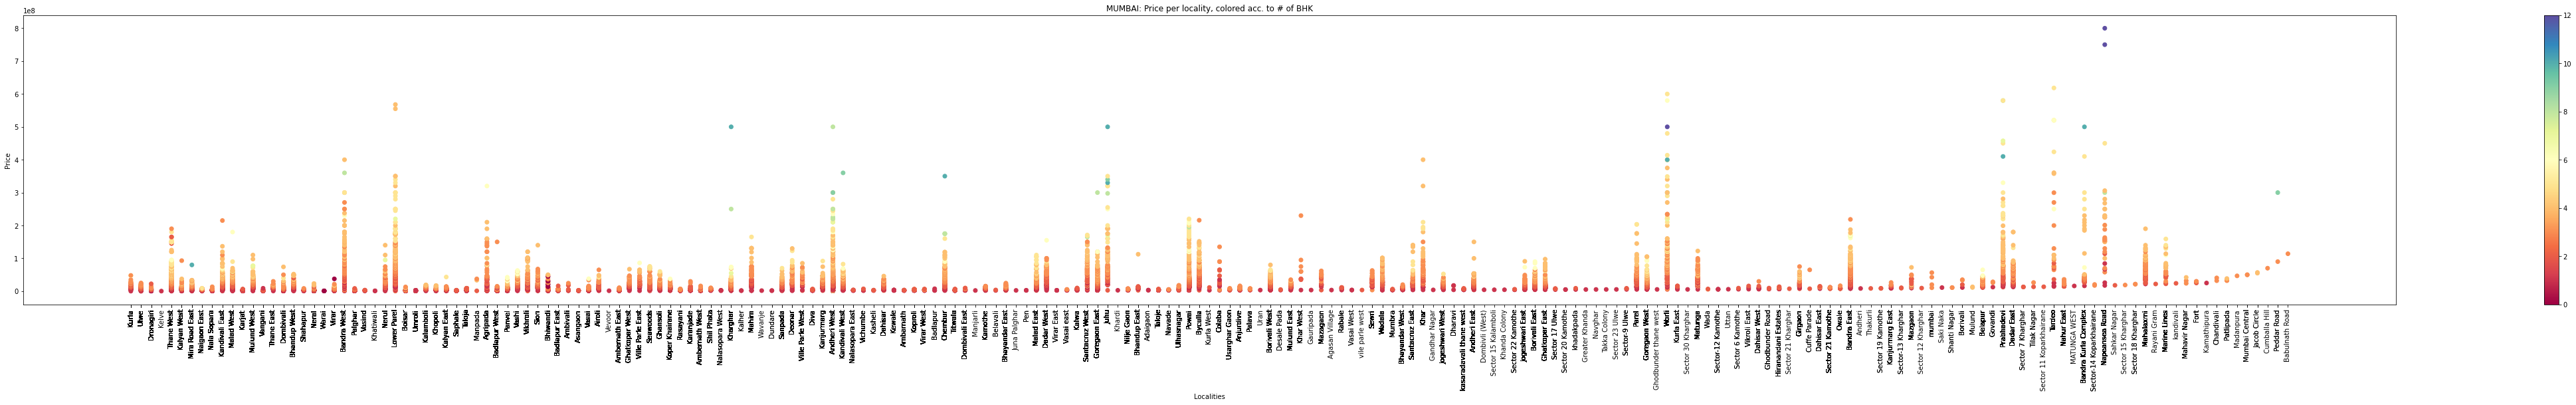

In [97]:
plt.figure(figsize=[80,8])
plt.scatter(df_m['Locality_Name'], df_m['Price'], c=df_m['No_of_BHK'], cmap='Spectral')
plt.colorbar()
plt.xticks(df_m['Locality_Name'], rotation='vertical')
plt.xlabel('Localities')
plt.ylabel('Price')
plt.title('MUMBAI: Price per locality, colored acc. to # of BHK')

Now, we will look at the office hotspots specifically in Mumbai and Ahemdabad. We can divide this into 2 subsets. Investers who are interested in a single locality should find a locality with the most available properties, and those who are diversified should find the locality that, along with other neighbouring localities would form the max available properties for sale. The first subset is easily solvable by looking at the datasets and respective frequencies for each locality. We do this in the following part for both the cities.

The second subset, although solvable, involves dynamic programming algorithms on the dataset and higher computation power, which is beyond the scope of this assignment.

In [109]:
# Ahembdabad
df_a['Locality_Name'].value_counts()

Bopal         999
Shela         984
Gota          825
Chandkheda    295
Thaltej       239
             ... 
Visalpur        1
Jodhpur         1
Shahpur         1
Rethal          1
Saraspur        1
Name: Locality_Name, Length: 100, dtype: int64

In [110]:
# Mumbai
df_m['Locality_Name'].value_counts()

Mira Road East     9590
Thane West         9559
Dombivali          3475
Kharghar           2610
Virar              2338
                   ... 
Dombivli (West)       1
Gandhar Nagar         1
vile parle west       1
Agasan Village        1
Babulnath Road        1
Name: Locality_Name, Length: 213, dtype: int64

Evidently, the localities Bhopal and Mira Road East are good hotspots for offices in Ahemdabad and Mumbai with 999 and 9590 available properties for sale respectively.